# Title: Stock Market Prediction Using Support Vector Regressor with Radial Basis Function Kernel

#### Group Member Names : 
Aryan Radadiya 200570960 
<br>Sravya N Medaramitla 200612749



### INTRODUCTION:
As of 2020, the most popular investment method in Indonesia was stocks. There was a 56% increase in capital market investors from 2019 to 2020. This increase was due to stocks ability to return large profits. However, many of these individuals do not understand the stocks in terms of their true value and get stuck in cheap stocks often recommended by other individuals. They fail to evaluate the large risks they are taking often leading to extensive losses. These individuals also do not understand the importance of portfolio diversification. Some individuals who have experienced these losses have even committed suicide. 
*********************************************************************************************************************
#### AIM :
The aim of this paper is to increase public interest especially the millennial generation to safely invest in stocks, to increase their profits when investing and to reduce deaths caused by stock investment losses, and we will try to optimize the results by performing different technique and using latest dataset.
*********************************************************************************************************************
#### Github Repo:
Research Paper Repo:
https://github.com/K6RTCS/Stock-Market-Prediction-RBF

Group Repo:
https://github.com/AryanRadadiya200570960/AIDI1002-Final-Project

*********************************************************************************************************************
#### DESCRIPTION OF PAPER:
This paper uses historical stock data from Yahoo Finance spanning over 12 years. The dataset selected is for one of Indonesia’s major banking industries. This dataset is preprocessed and is trained on the Support Vector Machine model using the Radial Basis Function Kernel. The metrics of the kernel is 10000 C value and  0.15 gamma value.  This output is then evaluated with the use of metrics like Root Mean Square Error, Root Square, Mean Absolute Value. These metrics highlight the model’s predictive performance and display its ability to make accurate predictions. 
*********************************************************************************************************************
#### PROBLEM STATEMENT :
Beginner investors often make investment decisions based on incomplete knowledge or recommendations often leading to significant losses. This paper intends to create a machine learning based model that can predict future stock prices based on historical stock data. 

*********************************************************************************************************************
#### CONTEXT OF THE PROBLEM:
-	Rise in popularity of stocks as an investment option in Indonesia. 
-	Growing number of participants in the markets. 
-	Individual difficulty in predicting stock prices due to their complex patterns and volatility. 
-	Accurate predictions can help reduce risk and create better investment strategies. 

*********************************************************************************************************************
#### SOLUTION:
Using Support Vector Regressor with the Radial Basis Function Kernel to process and predict stock prices. However, we will use Long short-term memory (LSTM) to optimize performance. 


# Background
*********************************************************************************************************************


| **Reference** | **Explanation**                                                                                                                                             | **Dataset/Input**                                                                                          | **Weakness**                                                                                                                |
|---------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------|
| [1]           | Reports a 56% increase in capital market investors in Indonesia from 2019 to 2020, reflecting a growing interest in stock investments.                      | Investor statistics from the Indonesia Stock Exchange.                                                    | Lacks focus on the challenges faced by these new investors, such as lack of financial knowledge or experience.               |
| [2]           | Discusses a case of financial distress caused by stock market losses, emphasizing the need for better investment tools.                                      | A reported suicide due to stock losses.                                                                   | Provides anecdotal evidence rather than broad statistical data.                                                              |
| [3]           | Highlights the effectiveness of Support Vector Machines (SVM) for stock price prediction using a Radial Basis Function (RBF) kernel.                        | Dataset of historical stock data from previous studies.                                                   | Focused on theoretical predictions; lacks emphasis on real-world testing scenarios.                                          |
| [4]           | Explores machine learning-based stock market prediction using Yahoo Finance data from 2014–2016, achieving an 89% prediction accuracy.                      | Yahoo Finance data on stock prices from 2014 to 2016.                                                     | Does not provide insights into model performance with data from other timeframes or different datasets.                       |
| [5]           | Compares SVM and Artificial Neural Networks (ANNs) for stock market predictions, concluding that SVM performs better with RBF kernels.                      | IBM Inc. stock data.                                                                                      | Limited application to specific datasets and does not address generalizability to other markets.                             |
| [6]           | Evaluates SVM's effectiveness for predicting stock price movements in bull and bear markets using historical financial data.                                | S&P 500 stock data.                                                                                       | Performance metrics not consistent across all types of markets (e.g., volatile or emerging markets).                          |
| [7]           | Shows that machine learning techniques improve predictive accuracy for stock prices by up to 86% compared to traditional approaches.                        | Generalized results from multiple datasets.                                                               | Lacks details about specific datasets or the types of models used to achieve the improvements.                                |
| [8][9][10][11]| Demonstrates that historical stock price data can predict future trends using various machine learning and regression-based models.                         | Historical stock data from different financial indices, including S&P 500, CSI300, and Nikkei225.         | Generalized findings with no focus on the challenges or limitations of individual prediction models.                          |
| [12]          | Reviews previous literature suggesting stock market prediction is possible but acknowledges difficulties due to market volatility and unknown factors.      | Stock market data from multiple sources.                                                                  | Highlights unpredictability without providing specific solutions for handling unknown market variables.                       |
| [13]          | Evaluates the use of neural networks for stock index price prediction across markets like CSI300, S&P 500, and Nikkei225, concluding that UA models perform best. | Stock index data from China, the USA, and Japan.                                                          | Overemphasis on neural networks; lacks comparison with simpler, less resource-intensive models like SVM.                      |
| [14]          | Explores fuzzy inference systems for stock price prediction using features like Market Cap and General Value, achieving close predictions to actual prices. | BEXINGO dataset from the Chittagong Stock Exchange in Bangladesh.                                         | Limited dataset scope; effectiveness in other markets remains untested.                                                      |
| [15]          | Dataset spans 2009–2021 for one of Indonesia’s largest banking industries, used to train and evaluate the SVR model with RBF kernel.                       | Yahoo Finance data (2009–2021) including features such as Open, Close, High, Low, and Volume.             | Model might face challenges when applied to different industries or datasets with varying feature characteristics.            |




*********************************************************************************************************************






# Implement paper code :
*********************************************************************************************************************



In [6]:
import numpy as np
import pandas as pd
import datetime
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [7]:
import yfinance as yf
# Get the stock data using yfinance API:
# get 2009-2019 data to train our model
train_data = yf.download('BBCA.JK', start='2010-01-04', end='2019-12-03')

# get 2020 data to present date to test the SVM model
# test_data = yf.download('BBCA.JK', start='2020-01-02', end=datetime.date.today())
test_data = yf.download('BBCA.JK', start='2020-01-04', end='2021-12-03')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
#Removing the multi-level column names
train_data.columns = train_data.columns.droplevel(-1)
train_data

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,796.387756,1010.0,1010.0,965.0,1010.0,77812500
2010-01-05,804.272644,1020.0,1020.0,990.0,1020.0,44442500
2010-01-06,780.617615,990.0,1020.0,990.0,990.0,27782500
2010-01-07,784.560181,995.0,995.0,965.0,995.0,38632500
2010-01-08,764.847534,970.0,995.0,970.0,970.0,27427500
...,...,...,...,...,...,...
2019-11-26,5619.018555,6285.0,6330.0,6270.0,6330.0,192783500
2019-11-27,5632.429199,6300.0,6300.0,6240.0,6270.0,58833500
2019-11-28,5587.728516,6250.0,6295.0,6245.0,6295.0,44248000


In [9]:
test_data.columns = test_data.columns.droplevel(-1)
test_data

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-06,6040.390625,6735.0,6750.0,6690.0,6720.0,27300000
2020-01-07,6044.876465,6740.0,6770.0,6730.0,6735.0,45022500
2020-01-08,5991.063477,6680.0,6745.0,6670.0,6670.0,53692500
2020-01-09,6044.876465,6740.0,6755.0,6730.0,6740.0,40363500
2020-01-10,6031.422363,6725.0,6825.0,6710.0,6765.0,73362000
...,...,...,...,...,...,...
2021-11-26,6773.577637,7275.0,7450.0,7250.0,7400.0,113288400
2021-11-29,6889.962402,7400.0,7425.0,7175.0,7275.0,87907900
2021-11-30,6773.577637,7275.0,7425.0,7275.0,7325.0,144923700


In [10]:
# sort by date
train_data = train_data.sort_values('Date')
test_data = test_data.sort_values('Date')

# fix the date 
train_data.reset_index(inplace=True)
train_data.set_index("Date", inplace=True)
test_data.reset_index(inplace=True)
test_data.set_index("Date", inplace=True)

date_test = test_data.copy()
date_test = date_test.reset_index()

In [11]:
train_data

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,796.387756,1010.0,1010.0,965.0,1010.0,77812500
2010-01-05,804.272644,1020.0,1020.0,990.0,1020.0,44442500
2010-01-06,780.617615,990.0,1020.0,990.0,990.0,27782500
2010-01-07,784.560181,995.0,995.0,965.0,995.0,38632500
2010-01-08,764.847534,970.0,995.0,970.0,970.0,27427500
...,...,...,...,...,...,...
2019-11-26,5619.018555,6285.0,6330.0,6270.0,6330.0,192783500
2019-11-27,5632.429199,6300.0,6300.0,6240.0,6270.0,58833500
2019-11-28,5587.728516,6250.0,6295.0,6245.0,6295.0,44248000


In [12]:
test_data

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-06,6040.390625,6735.0,6750.0,6690.0,6720.0,27300000
2020-01-07,6044.876465,6740.0,6770.0,6730.0,6735.0,45022500
2020-01-08,5991.063477,6680.0,6745.0,6670.0,6670.0,53692500
2020-01-09,6044.876465,6740.0,6755.0,6730.0,6740.0,40363500
2020-01-10,6031.422363,6725.0,6825.0,6710.0,6765.0,73362000
...,...,...,...,...,...,...
2021-11-26,6773.577637,7275.0,7450.0,7250.0,7400.0,113288400
2021-11-29,6889.962402,7400.0,7425.0,7175.0,7275.0,87907900
2021-11-30,6773.577637,7275.0,7425.0,7275.0,7325.0,144923700


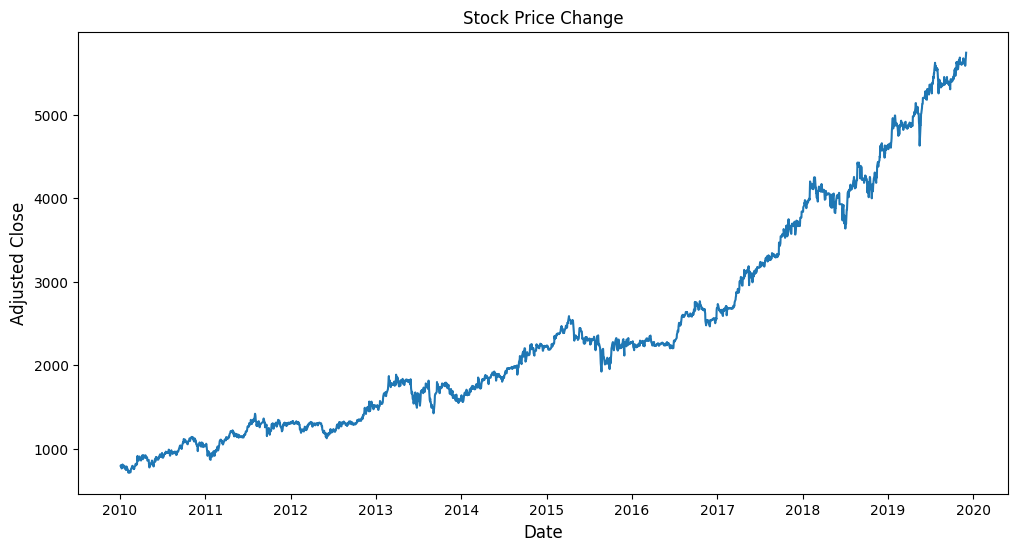

In [ ]:
# time series graph for Adj Close
from matplotlib import pyplot as plt

#style.use('seaborn')
plt.figure(figsize = (12,6))
plt.plot(train_data["Adj Close"])
plt.title("Stock Price Change")
plt.xlabel("Date", fontsize = 12)
plt.ylabel("Adjusted Close", fontsize = 12)
plt.show()

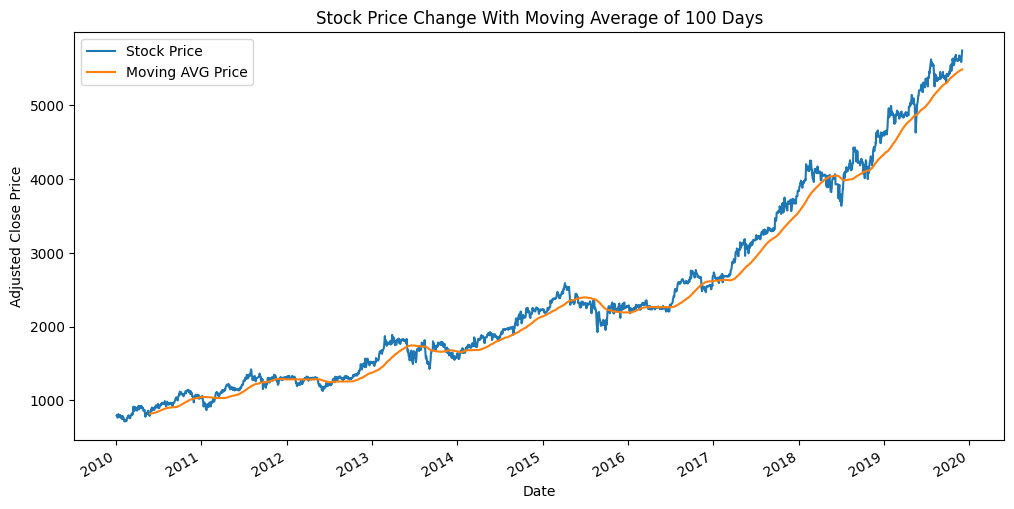

In [14]:
# Rolling mean
close_price = train_data['Adj Close']
moving_avg = close_price.rolling(window=100).mean()

plt.figure(figsize = (12,6))
plt.title("Stock Price Change With Moving Average of 100 Days")
close_price.plot(label='Stock Price')
moving_avg.plot(label='Moving AVG Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()

In [15]:
import matplotlib.dates as mdates

# change the dates into ints for training 
indxed_dates = train_data.copy()
indxed_dates = indxed_dates.reset_index()

# Store the original dates for plotting the predicitons
actual_dates = indxed_dates['Date']

# convert to ints
indxed_dates['Date'] = indxed_dates['Date'].map(mdates.date2num)

indxed_dates

Price,Date,Adj Close,Close,High,Low,Open,Volume
0,14613.0,796.387756,1010.0,1010.0,965.0,1010.0,77812500
1,14614.0,804.272644,1020.0,1020.0,990.0,1020.0,44442500
2,14615.0,780.617615,990.0,1020.0,990.0,990.0,27782500
3,14616.0,784.560181,995.0,995.0,965.0,995.0,38632500
4,14617.0,764.847534,970.0,995.0,970.0,970.0,27427500
...,...,...,...,...,...,...,...
2467,18226.0,5619.018555,6285.0,6330.0,6270.0,6330.0,192783500
2468,18227.0,5632.429199,6300.0,6300.0,6240.0,6270.0,58833500
2469,18228.0,5587.728516,6250.0,6295.0,6245.0,6295.0,44248000
2470,18229.0,5614.549316,6280.0,6295.0,6225.0,6230.0,52954500


In [16]:
# Use sklearn support vector regression to predicit our data:
from sklearn.svm import SVR

dates_data = indxed_dates['Date'].to_numpy()
prices_data = train_data['Adj Close'].to_numpy()

#Convert to 1d Vector
dates_data = np.reshape(dates_data, (len(dates_data), 1))
prices_data = np.reshape(prices_data, (len(prices_data), 1))

In [17]:
SVR_linear = make_pipeline(StandardScaler(), SVR(kernel='linear', C=1e4))
SVR_linear.fit(dates_data, prices_data)
SVR_linear_train = SVR_linear.predict(dates_data)

c:\Users\aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
SVR_linear_train

array([ 479.16594608,  480.18032041,  481.19469477, ..., 4146.12914881,
       4147.14352312, 4150.18664611])

In [19]:
SVR_rbfk = SVR(kernel= 'rbf', C= 1e4, gamma= 0.1)
SVR_rbfk.fit(dates_data, prices_data)
SVR_rbfk_train = SVR_rbfk.predict(dates_data)

c:\Users\aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
SVR_rbfk_train

array([ 796.48711989,  795.42231905,  794.80326196, ..., 5587.82866145,
       5614.44954241, 5744.08464094])

In [21]:
SVR_poly = make_pipeline(StandardScaler(), SVR(kernel='poly', C=1e3, degree=3, epsilon=0.1, coef0=1))
SVR_poly.fit(dates_data, prices_data)
SVR_poly_train = SVR_poly.predict(dates_data)

c:\Users\aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
SVR_poly_train

array([ 731.69130799,  732.80520558,  733.91798169, ..., 5769.30495802,
       5773.28698567, 5785.24932885])

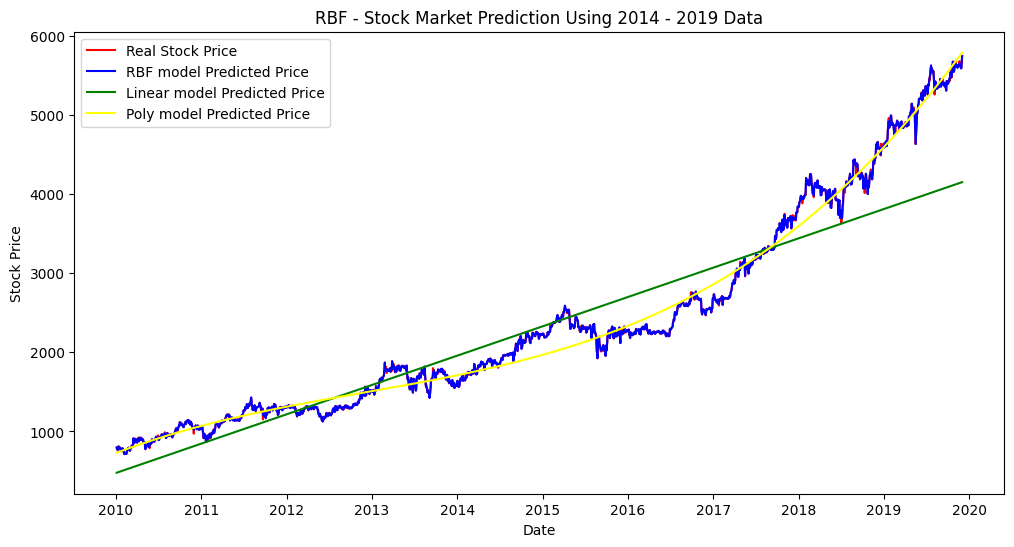

In [23]:
plt.figure(figsize = (12,6))
plt.title('RBF - Stock Market Prediction Using 2014 - 2019 Data')
plt.plot(dates_data, prices_data, color= 'red', label= 'Real Stock Price')
plt.plot(actual_dates, SVR_rbfk_train, color= 'blue', label= 'RBF model Predicted Price') 
plt.plot(actual_dates, SVR_linear_train, color= 'green', label= 'Linear model Predicted Price') 
plt.plot(actual_dates, SVR_poly_train, color= 'yellow', label= 'Poly model Predicted Price') 
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [24]:
# change the dates into ints for training 
test_indxed_dates = test_data.copy()
test_indxed_dates = test_indxed_dates.reset_index()

# Store the original dates for plotting the predicitons
test_actual_dates = test_indxed_dates['Date']

# convert to ints
test_indxed_dates['Date'] = test_indxed_dates['Date'].map(mdates.date2num)

In [25]:
test_indxed_dates

Price,Date,Adj Close,Close,High,Low,Open,Volume
0,18267.0,6040.390625,6735.0,6750.0,6690.0,6720.0,27300000
1,18268.0,6044.876465,6740.0,6770.0,6730.0,6735.0,45022500
2,18269.0,5991.063477,6680.0,6745.0,6670.0,6670.0,53692500
3,18270.0,6044.876465,6740.0,6755.0,6730.0,6740.0,40363500
4,18271.0,6031.422363,6725.0,6825.0,6710.0,6765.0,73362000
...,...,...,...,...,...,...,...
462,18957.0,6773.577637,7275.0,7450.0,7250.0,7400.0,113288400
463,18960.0,6889.962402,7400.0,7425.0,7175.0,7275.0,87907900
464,18961.0,6773.577637,7275.0,7425.0,7275.0,7325.0,144923700
465,18962.0,6796.854980,7300.0,7450.0,7275.0,7275.0,76538100


In [26]:
test_dates_data = test_indxed_dates['Date'].to_numpy()
test_prices_data = test_data['Adj Close'].to_numpy()

#Convert to 1d Vector
test_dates_data = np.reshape(test_dates_data, (len(test_dates_data), 1))
test_prices_data = np.reshape(test_prices_data, (len(test_prices_data), 1))

In [27]:
SVR_rbfk = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
SVR_rbfk.fit(test_dates_data, test_prices_data)
SVR_rbfk_test = SVR_rbfk.predict(test_dates_data)
SVR_rbfk_test

c:\Users\aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([6040.29048474, 6044.77608733, 6045.11022557, 6044.77662594,
       6031.52201339, 6049.46057215, 6098.02753299, 6129.97731833,
       6148.71747295, 6165.85246599, 6129.97756178, 6125.69338834,
       6134.46172857, 6129.2741249 , 6107.7570939 , 6134.46208293,
       6134.9042813 , 6085.13477692, 5969.36280001, 5811.78950802,
       5775.91565135, 5919.21415575, 6021.51503119, 6059.18481378,
       6062.71267105, 6085.13411953, 6102.27603045, 6098.58791902,
       6053.21339468, 5991.16345408, 6026.83847872, 6021.98047159,
       5986.7305694 , 5953.24080249, 5932.66807186, 5852.14978481,
       5808.16697351, 5757.97832203, 5705.37331987, 5641.18659324,
       5541.52720269, 5668.09113443, 5775.91635507, 5742.20917959,
       5560.66874533, 5285.85578775, 5313.83116176, 5233.87834   ,
       5078.96793708, 4986.67316131, 4986.47314711, 4747.81973936,
       4484.43004675, 4321.13693485, 4246.55976686, 3973.21543427,
       4100.32921915, 4735.35076129, 4941.83082068, 4976.20301

In [28]:
SVR_linear = make_pipeline(StandardScaler(), SVR(kernel='linear', C=1))
SVR_linear.fit(test_dates_data, test_prices_data)
SVR_linear_test =  SVR_linear.predict(test_dates_data)
SVR_linear_test

c:\Users\aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([5624.46166177, 5625.09378615, 5625.72591052, 5626.35803489,
       5626.99015927, 5628.88653239, 5629.51865676, 5630.15078114,
       5630.78290551, 5631.41502988, 5633.31140301, 5633.94352738,
       5634.57565175, 5635.20777613, 5635.8399005 , 5637.73627362,
       5638.368398  , 5639.00052237, 5639.63264674, 5640.26477112,
       5642.16114424, 5642.79326861, 5643.42539299, 5644.05751736,
       5644.68964173, 5646.58601485, 5647.21813923, 5647.8502636 ,
       5648.48238798, 5649.11451235, 5651.01088547, 5651.64300985,
       5652.27513422, 5652.90725859, 5653.53938297, 5655.43575609,
       5656.06788046, 5656.70000484, 5657.33212921, 5657.96425358,
       5659.8606267 , 5660.49275108, 5661.12487545, 5661.75699983,
       5662.3891242 , 5664.28549732, 5664.91762169, 5665.54974607,
       5666.18187044, 5666.81399482, 5668.71036794, 5669.34249231,
       5669.97461668, 5670.60674106, 5671.23886543, 5673.13523855,
       5673.76736293, 5675.03161167, 5675.66373605, 5677.56010

In [29]:
SVR_poly = make_pipeline(StandardScaler(), SVR(kernel='poly', C=1e3, degree=4, epsilon=0.1, coef0=1))
SVR_poly.fit(test_dates_data, test_prices_data)
SVR_poly_test = SVR_poly.predict(test_dates_data)
SVR_poly_test

c:\Users\aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([6529.37351045, 6498.32936536, 6467.68491782, 6437.43755158,
       6407.58465789, 6320.36683643, 6292.0658946 , 6264.14649351,
       6236.60606918, 6209.44206513, 6130.18312168, 6104.49938313,
       6079.17939439, 6054.22064377, 6029.62062706, 5957.94805009,
       5934.75807609, 5911.91442689, 5889.41464306, 5867.25627265,
       5802.80523447, 5781.98814759, 5761.50032638, 5741.33936369,
       5721.50285985, 5663.91621658, 5645.35370065, 5627.10375717,
       5609.16403126, 5591.53217551, 5540.46046712, 5524.03676726,
       5507.90931252, 5492.07580029, 5476.53393543, 5431.63538573,
       5417.23730832, 5403.11951461, 5389.27975424, 5375.71578437,
       5336.65630097, 5324.17321369, 5311.95481457, 5299.99890553,
       5288.30329599, 5254.75647035, 5244.08030215, 5233.65359247,
       5223.4741955 , 5213.53997293, 5185.18708034, 5176.21232144,
       5167.47215731, 5158.96449443, 5150.68724674, 5127.21724632,
       5119.84094822, 5105.74660154, 5099.02447793, 5080.13401

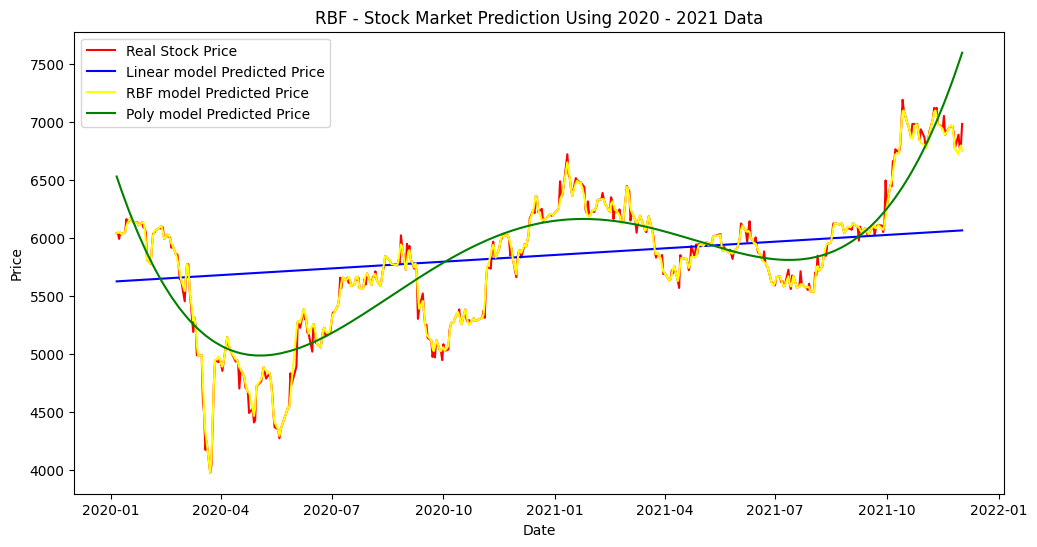

In [30]:
plt.figure(figsize = (12,6))
plt.title('RBF - Stock Market Prediction Using 2020 - 2021 Data')
plt.plot(test_dates_data, test_prices_data, color= 'red', label= 'Real Stock Price')
plt.plot(test_actual_dates, SVR_linear_test, color= 'blue', label= 'Linear model Predicted Price')
plt.plot(test_actual_dates, SVR_rbfk_test, color= 'yellow', label= 'RBF model Predicted Price')
plt.plot(test_actual_dates, SVR_poly_test, color= 'green', label= 'Poly model Predicted Price') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("SVR RBF Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(prices_data, SVR_rbfk_train)))

print("SVR RBF Train R2 Score: %.2f"
      % r2_score(prices_data, SVR_rbfk_train))

print("SVR RBF Train MAE Score: %.2f"
      % mean_absolute_error(prices_data, SVR_rbfk_train))

print("SVR RBF Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(test_prices_data, SVR_rbfk_test)))

print("SVR RBF Test R2 Score: %.2f"
      % r2_score(test_prices_data, SVR_rbfk_test))

print("SVR RBF Test MAE Score: %.2f"
      % mean_absolute_error(test_prices_data, SVR_rbfk_test))

SVR RBF Train RMSE: 11.87
SVR RBF Train R2 Score: 1.00
SVR RBF Train MAE Score: 3.90
SVR RBF Test RMSE: 50.13
SVR RBF Test R2 Score: 0.99
SVR RBF Test MAE Score: 23.66


In [32]:
print("SVR Linear Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(prices_data, SVR_linear_train)))

print("SVR Linear Train R2 Score: %.2f"
      % r2_score(prices_data, SVR_linear_train))

print("SVR Linear Train MAE Score: %.2f"
      % mean_absolute_error(prices_data, SVR_linear_train))

print("SVR Linear Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(test_prices_data, SVR_linear_test)))

print("SVR Linear Test R2 Score: %.2f"
      % r2_score(test_prices_data, SVR_linear_test))

print("SVR Linear Test MAE Score: %.2f"
      % mean_absolute_error(test_prices_data, SVR_linear_test))

SVR Linear Train RMSE: 484.65
SVR Linear Train R2 Score: 0.86
SVR Linear Train MAE Score: 351.29
SVR Linear Test RMSE: 530.33
SVR Linear Test R2 Score: 0.21
SVR Linear Test MAE Score: 410.22


In [33]:
print("SVR Poly Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(prices_data, SVR_poly_train)))

print("SVR Poly Train R2 Score: %.2f"
      % r2_score(prices_data, SVR_poly_train))

print("SVR Poly Train MAE Score: %.2f"
      % mean_absolute_error(prices_data, SVR_poly_train))

print("SVR Poly Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(test_prices_data, SVR_poly_test)))

print("SVR Poly Test R2 Score: %.2f"
      % r2_score(test_prices_data, SVR_poly_test))

print("SVR Poly Test MAE Score: %.2f"
      % mean_absolute_error(test_prices_data, SVR_poly_test))

SVR Poly Train RMSE: 160.80
SVR Poly Train R2 Score: 0.99
SVR Poly Train MAE Score: 121.62
SVR Poly Test RMSE: 316.33
SVR Poly Test R2 Score: 0.72
SVR Poly Test MAE Score: 243.83


*********************************************************************************************************************
### Contribution  Code :


In [40]:
# Get the stock data using yfinance
# get 2015-2022 data to train our model
train_data = yf.download('BBCA.JK', start='2015-01-01', end='2022-12-31')

# get 2023 data to present date to test the SVM model
test_data = yf.download('BBCA.JK', start='2023-01-01', end='2024-11-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
#Removing the multi-level column names
train_data.columns = train_data.columns.droplevel(-1)
train_data

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2015-01-02,2238.016602,2645.0,2655.0,2630.0,2655.0,29302500
2015-01-05,2233.785645,2640.0,2640.0,2625.0,2630.0,25434500
2015-01-06,2216.863037,2620.0,2640.0,2600.0,2600.0,48681500
2015-01-07,2221.093750,2625.0,2640.0,2610.0,2610.0,40334000
2015-01-08,2195.709961,2595.0,2630.0,2595.0,2625.0,54457000
...,...,...,...,...,...,...
2022-12-26,8137.983887,8575.0,8625.0,8500.0,8500.0,20495900
2022-12-27,8161.709961,8600.0,8650.0,8575.0,8600.0,27193800
2022-12-28,8209.162109,8650.0,8650.0,8550.0,8650.0,40420200


In [42]:
test_data.columns = test_data.columns.droplevel(-1)
test_data

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-01-02,8114.258789,8550.0,8600.0,8500.0,8575.0,10653900
2023-01-03,8114.258789,8550.0,8600.0,8525.0,8550.0,27399100
2023-01-04,7924.451660,8350.0,8575.0,8350.0,8525.0,90918800
2023-01-05,7829.547363,8250.0,8375.0,8150.0,8350.0,128838500
2023-01-06,7876.999512,8300.0,8325.0,8100.0,8100.0,69286600
...,...,...,...,...,...,...
2024-10-25,10696.649414,10750.0,10750.0,10625.0,10650.0,34847500
2024-10-28,10547.394531,10600.0,10825.0,10600.0,10825.0,39061500
2024-10-29,10447.890625,10500.0,10575.0,10500.0,10525.0,49680100


In [43]:
# sort by date
train_data = train_data.sort_values('Date')
test_data = test_data.sort_values('Date')

train_data.reset_index(inplace=True)
test_data.reset_index(inplace=True)

In [44]:
train_data

Price,Date,Adj Close,Close,High,Low,Open,Volume
0,2015-01-02,2238.016602,2645.0,2655.0,2630.0,2655.0,29302500
1,2015-01-05,2233.785645,2640.0,2640.0,2625.0,2630.0,25434500
2,2015-01-06,2216.863037,2620.0,2640.0,2600.0,2600.0,48681500
3,2015-01-07,2221.093750,2625.0,2640.0,2610.0,2610.0,40334000
4,2015-01-08,2195.709961,2595.0,2630.0,2595.0,2625.0,54457000
...,...,...,...,...,...,...,...
1994,2022-12-26,8137.983887,8575.0,8625.0,8500.0,8500.0,20495900
1995,2022-12-27,8161.709961,8600.0,8650.0,8575.0,8600.0,27193800
1996,2022-12-28,8209.162109,8650.0,8650.0,8550.0,8650.0,40420200
1997,2022-12-29,8137.983887,8575.0,8600.0,8500.0,8525.0,47020900


In [45]:
test_data

Price,Date,Adj Close,Close,High,Low,Open,Volume
0,2023-01-02,8114.258789,8550.0,8600.0,8500.0,8575.0,10653900
1,2023-01-03,8114.258789,8550.0,8600.0,8525.0,8550.0,27399100
2,2023-01-04,7924.451660,8350.0,8575.0,8350.0,8525.0,90918800
3,2023-01-05,7829.547363,8250.0,8375.0,8150.0,8350.0,128838500
4,2023-01-06,7876.999512,8300.0,8325.0,8100.0,8100.0,69286600
...,...,...,...,...,...,...,...
432,2024-10-25,10696.649414,10750.0,10750.0,10625.0,10650.0,34847500
433,2024-10-28,10547.394531,10600.0,10825.0,10600.0,10825.0,39061500
434,2024-10-29,10447.890625,10500.0,10575.0,10500.0,10525.0,49680100
435,2024-10-30,10298.634766,10350.0,10400.0,10275.0,10275.0,114484100


In [46]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
#getting the data ready for the LSTM model
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data_train = scaler.fit_transform(train_data['Adj Close'].values.reshape(-1, 1))
scaled_data_test = scaler.fit_transform(test_data['Adj Close'].values.reshape(-1, 1))

In [ ]:
# Processing data for LSTM model
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60

In [ ]:
# Create the data for train and test
train_size = int(len(scaled_data_train) * 0.8)
test_size = len(scaled_data_train) - train_size
train_data1, test_data1 = scaled_data_train[0:train_size, :], scaled_data_train[train_size:len(scaled_data_train), :]

X_train1, y_train1 = create_dataset(train_data1, time_step)
X_test1, y_test1 = create_dataset(test_data1, time_step)

X_train1 = X_train1.reshape(X_train1.shape[0], X_train1.shape[1], 1)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], 1)

In [ ]:
#LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
#fitting data into the model
model.fit(X_train1, y_train1, batch_size=1, epochs=10)

Epoch 1/10
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - loss: 0.0046
Epoch 2/10
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - loss: 0.0020
Epoch 3/10
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - loss: 0.0018
Epoch 4/10
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - loss: 0.0015
Epoch 5/10
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - loss: 0.0013
Epoch 6/10
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - loss: 0.0011
Epoch 7/10
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - loss: 0.0010
Epoch 8/10
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - loss: 0.0012
Epoch 9/10
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - loss: 9.5263e-04
Epoch 10/10
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - loss: 0.0010


In [52]:
#predicting the data
train_predict = model.predict(X_train1)
test_predict = model.predict(X_test1)

49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [53]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train1 = scaler.inverse_transform([y_train1])
y_test1 = scaler.inverse_transform([y_test1])

In [54]:
#calculating the performance of model for train data
train_rmse = np.sqrt(mean_squared_error(y_train1[0], train_predict[:, 0]))
train_mae = mean_absolute_error(y_train1[0], train_predict[:, 0])
train_r2 = r2_score(y_train1[0], train_predict[:, 0])
test_rmse = np.sqrt(mean_squared_error(y_test1[0], test_predict[:, 0]))
test_mae = mean_absolute_error(y_test1[0], test_predict[:, 0])
test_r2 = r2_score(y_test1[0], test_predict[:, 0])

print(f'Train RMSE:', train_rmse)
print(f'Train MAE:', train_mae)
print(f'Train R2:', train_r2)
print(f'Test RMSE:', test_rmse)
print(f'Test MAE:', test_mae)
print(f'Test R2:', test_r2)

Train RMSE: 53.1724464999668
Train MAE: 41.5316035238937
Train R2: 0.9931214631639318
Test RMSE: 92.9607481956627
Test MAE: 74.50739097928609
Test R2: 0.9015311011571286


In [ ]:
#performing same steps for the test data
train_size = int(len(scaled_data_test) * 0.8)
test_size = len(scaled_data_test) - train_size
train_data2, test_data2 = scaled_data_test[0:train_size, :], scaled_data_test[train_size:len(scaled_data_test), :]

X_train2, y_train2 = create_dataset(train_data2, time_step)
X_test2, y_test2 = create_dataset(test_data2, time_step)

X_train2 = X_train2.reshape(X_train2.shape[0], X_train2.shape[1], 1)
X_test2 = X_test2.reshape(X_test2.shape[0], X_test2.shape[1], 1)

In [ ]:
#fitting data into the model
model.fit(X_train2, y_train2, batch_size=1, epochs=10)

Epoch 1/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 0.0033
Epoch 2/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0028
Epoch 3/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0024
Epoch 4/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0021
Epoch 5/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0017
Epoch 6/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0020
Epoch 7/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0019
Epoch 8/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0016
Epoch 9/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0019
Epoch 10/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - loss: 0.0021


In [ ]:
#predicting the data
train_predict2 = model.predict(X_train2)
test_predict2 = model.predict(X_test2)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


In [58]:
train_predict2 = scaler.inverse_transform(train_predict2)
test_predict2 = scaler.inverse_transform(test_predict2)
y_train2 = scaler.inverse_transform([y_train2])
y_test2 = scaler.inverse_transform([y_test2])

In [59]:
#calculating the performance of model for test data
train_rmse = np.sqrt(mean_squared_error(y_train2[0], train_predict2[:, 0]))
train_mae = mean_absolute_error(y_train2[0], train_predict2[:, 0])
train_r2 = r2_score(y_train2[0], train_predict2[:, 0])
test_rmse = np.sqrt(mean_squared_error(y_test2[0], test_predict2[:, 0]))
test_mae = mean_absolute_error(y_test2[0], test_predict2[:, 0])
test_r2 = r2_score(y_test2[0], test_predict2[:, 0])

print(f'Train RMSE:', train_rmse)
print(f'Train MAE:', train_mae)
print(f'Train R2:', train_r2)
print(f'Test RMSE:', test_rmse)
print(f'Test MAE:', test_mae)
print(f'Test R2:', test_r2)

Train RMSE: 117.44771995508223
Train MAE: 89.12285698784723
Train R2: 0.9205843779467691
Test RMSE: 125.68051753640354
Test MAE: 102.82533998842592
Test R2: 0.288241893260082


### Results :
The Long-short Term Model implemented was able to successfully predict stock price from dataset imported from yfinance, the paper used yahoo finance API but we used yfinance library instead which provides the same dataset but with different method. The evaluation metrics show that the model performed well and that deep learning is effective for time series prediction. 
#### Training Data(2015–2022): 
- Root Mean Square Error (RMSE): 117.45 - The relatively low RMSE indicates that the model effectively captured patterns in the training data. It demonstrates the LSTM’s ability to handle historical stock prices within the training range.
- Mean Absolute Error (MAE): 89.12 - This value shows the average absolute deviation between predicted and actual values, reflecting a moderate level of error for the training set.
- R² Score: 0.92 - A high R² score indicates that the model was able to explain 92% of the variance in the training data, showcasing strong performance during model training.
#### Testing Data (2023–2024):
- Root Mean Square Error (RMSE): 125.68 - The RMSE is higher on the testing dataset, indicating that the model had more difficulty predicting unseen stock price patterns from 2023–2024.
- Mean Absolute Error (MAE): 102.83 - This value is significantly higher than the MAE for the training set, highlighting that the model struggled with generalization and accurate predictions on new data.
- R² Score: 0.29 - The very low R² score indicates that the model was only able to explain 29% of the variance in the testing data. This suggests that the model failed to generalize well and was likely overfitting to the training data.


*******************************************************************************************************************************


### Observations :
#### RMSE (Error Magnitude):
- Training RMSE (117.45) is lower than testing RMSE (125.68), indicating better performance on the training data.
- The difference suggests that the model may be overfitting, as it performs much better on known data compared to unseen data.
#### MAE (Error Consistency):
- The MAE for training data (89.12) is notably lower than that for testing data (102.83), further supporting the observation that the model struggles with unseen data.
- The increased MAE on testing data points to inconsistent prediction accuracy, possibly due to market volatility in 2023–2024.
#### R² Score (Variance Explained):
- Training R² (0.92) shows that the model can explain nearly all variance in the training dataset, reflecting a good fit.
- Testing R² (0.29) is significantly lower, indicating that the model’s predictive power drops sharply on new data, likely due to overfitting or insufficient feature engineering.
#### Performance Gap:
- The performance gap between training and testing data highlights the model's limited generalizability. While it performs well on historical (training) data, it struggles with new market dynamics and unseen patterns in the testing set.
#### Impact of Market Volatility:
- Testing data (2023–2024) likely contains more unpredictable fluctuations compared to the training dataset. The lack of external features (e.g., news sentiment or macroeconomic indicators) may have made it harder for the model to account for these changes.

*******************************************************************************************************************************


### Conclusion and Future Direction :
*******************************************************************************************************************************
#### Learnings :
1.	Model Limitations on Testing Data: The low R² score on the testing set indicates that the LSTM struggled to adapt to new patterns in recent stock price movements.
2.	Volatility Impact: Stock market volatility poses significant challenges for time-series prediction models, particularly with fewer external features.
3.	Performance Metrics: RMSE, MAE, and R² together provide a clear picture of model accuracy and its ability to generalize.

*******************************************************************************************************************************
#### Results Discussion :
- The high training R² demonstrates the LSTM model's ability to learn from historical data, but the poor generalization on the test set highlights its limited robustness in real-world scenarios.
- The results underline the need for better feature engineering and model tuning to enhance performance on unseen data.

*******************************************************************************************************************************
#### Limitations :
1.	Overfitting: The model performs much better on training data than on testing data, indicating a lack of generalization.
2.	Insufficient Features: Using only stock prices limits the model’s ability to account for external factors like market sentiment or macroeconomic conditions.
3.	Timeframe Dependency: The chosen time window (2015–2022 for training) might not adequately capture long-term trends affecting 2023–2024.

*******************************************************************************************************************************
#### Future Extension :
1.	Feature Addition: Incorporate external data such as trading volume, financial news sentiment, and macroeconomic indicators to improve predictive accuracy.
2.	Regularization Techniques: Apply dropout more strategically or use other regularization methods to address overfitting.
3.	Model Comparison: Benchmark the LSTM against other models like SVR, ARIMA, or hybrid approaches to identify the best-performing model.
4.	Advanced Architectures: Experiment with transformers or attention mechanisms for better handling of long-term dependencies.
5.	Real-Time Updates: Develop a pipeline for real-time predictions with continuous retraining to adapt to market changes.


# References:

[1]:  Antonius Ricky, Kennedy Genesius, Michelle Setiawan, Richardo Nugroho Jaya, Derwin Suhartono. "Stock Market Prediction Using Support Vector Regressor with Radial Basis Function Kernel". Published in the Proceedings of the 5th International Conference on Image and Graphics Processing (ICIGP 2022). Available at: https://doi.org/10.1145/3512388.3512444

[2]: Dataset Source: Yahoo Finance, BBCA.JK historical stock data. https://pypi.org/project/yfinance/

[3]: Deep Learning Framework: TensorFlow and Keras libraries for implementing LSTM networks. https://www.tensorflow.org/

[4]: Python Package for Stock Data Retrieval: yfinance. Available at: https://github.com/ranaroussi/yfinance

[5]: GitHub Repository: "Stock Market Prediction with RBF Kernel". GitHub link: https://github.com/K6RTCS/Stock-Market-Prediction-RBF.git

[6]: Evaluation Metrics: Root Mean Square Error (RMSE), Mean Absolute Error (MAE), and R² Score. Definitions and calculations from scikit-learn. https://scikit-learn.org/

[7]: LSTM model: Theory about LSTM concept and understanding https://www.analyticsvidhya.com/blog/2021/12/stock-price-prediction-using-lstm/

[8]: understand LSTM implementation on time series data https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm